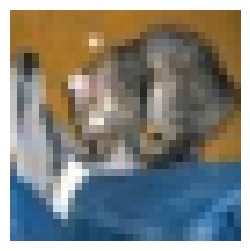

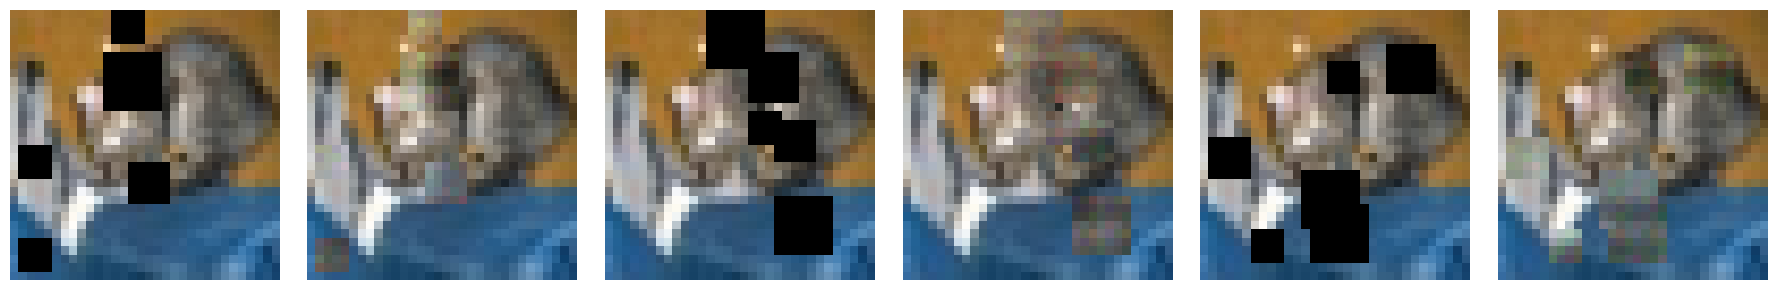

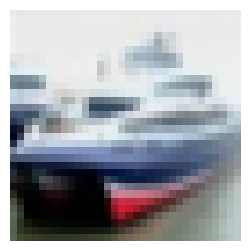

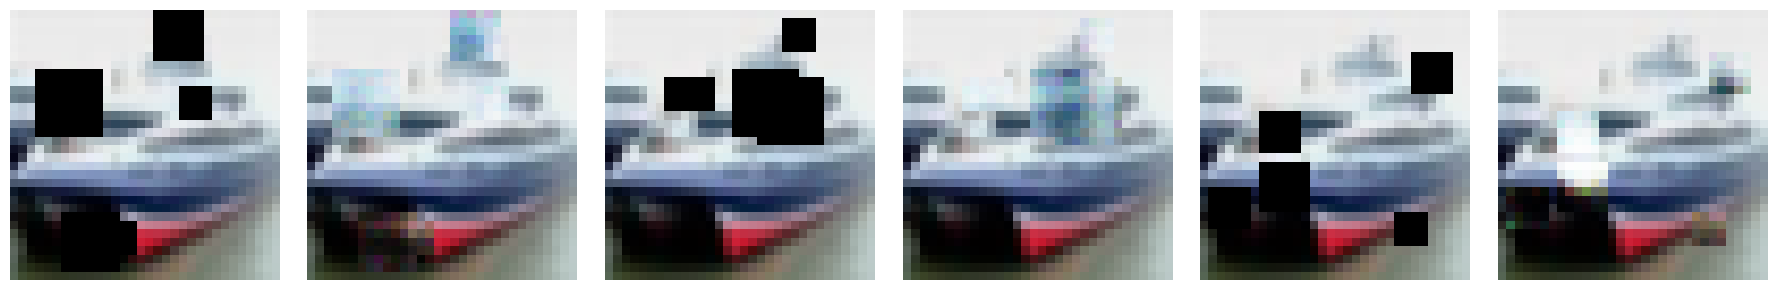

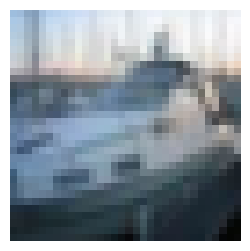

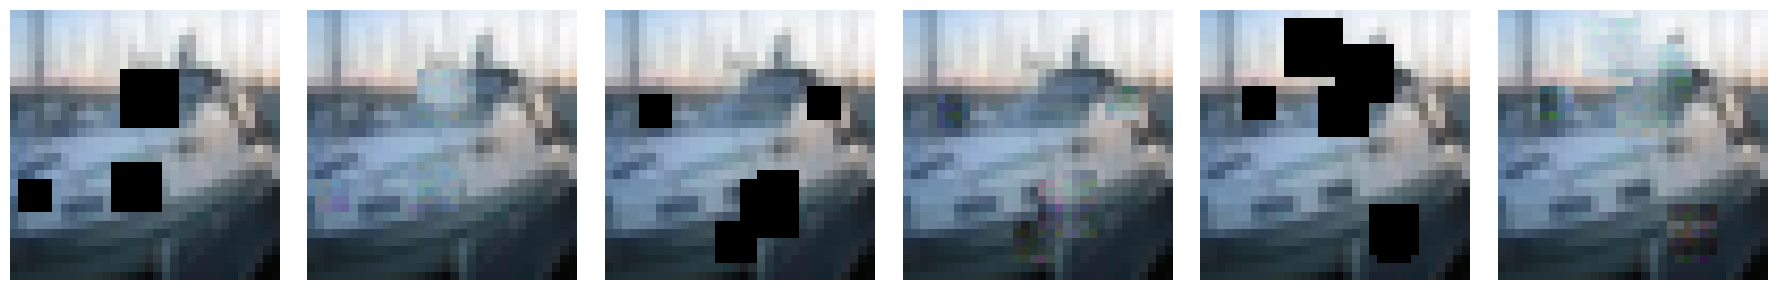

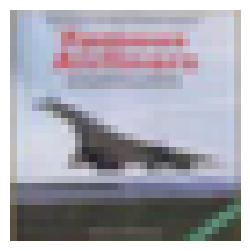

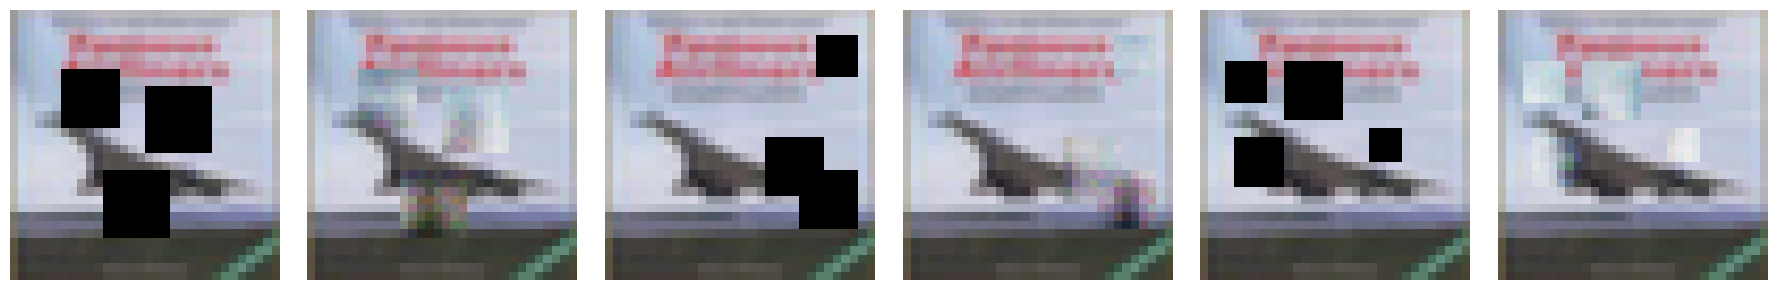

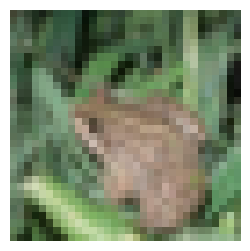

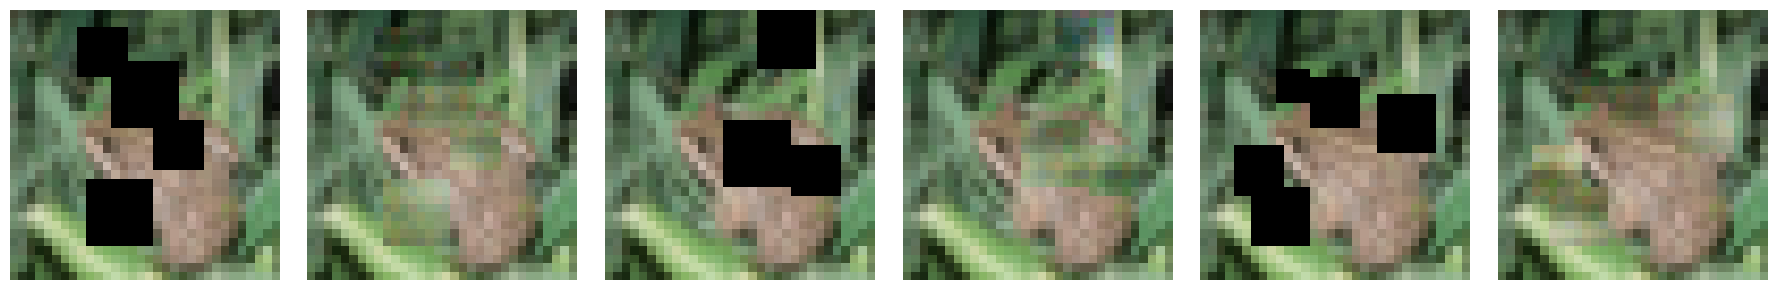

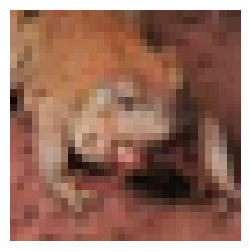

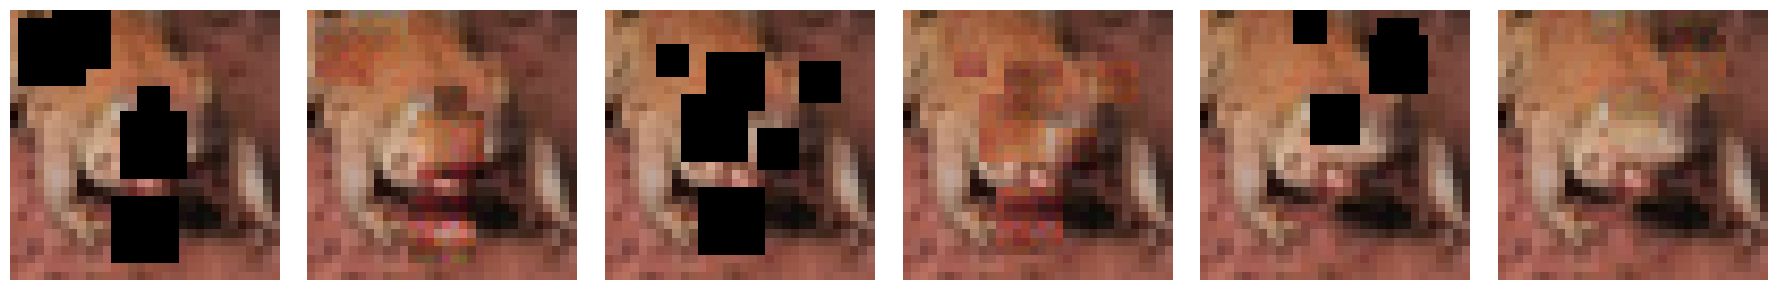

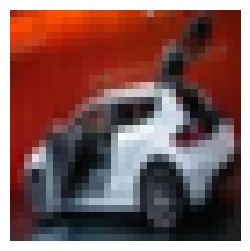

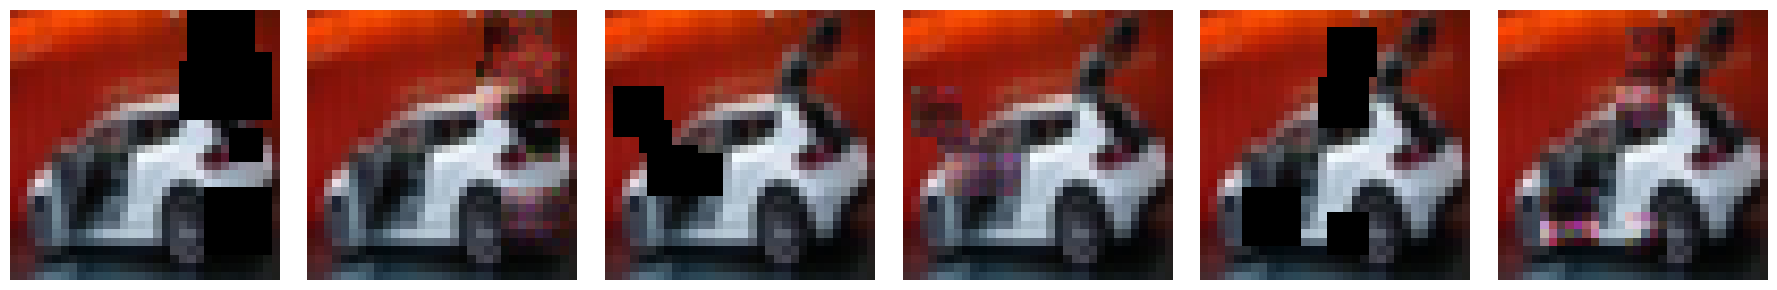

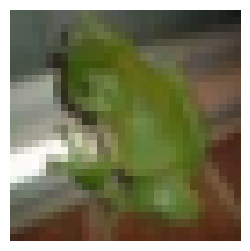

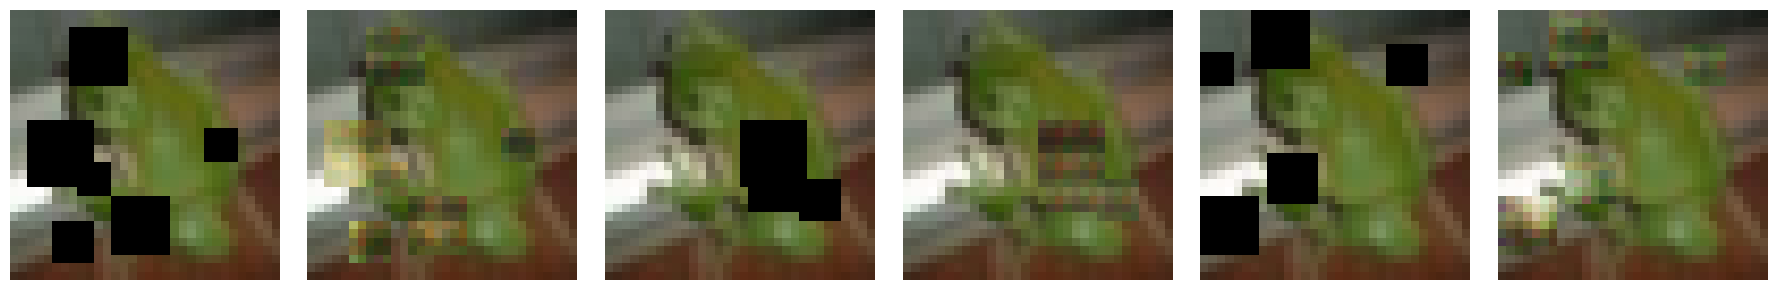

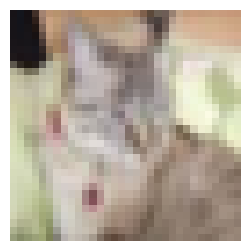

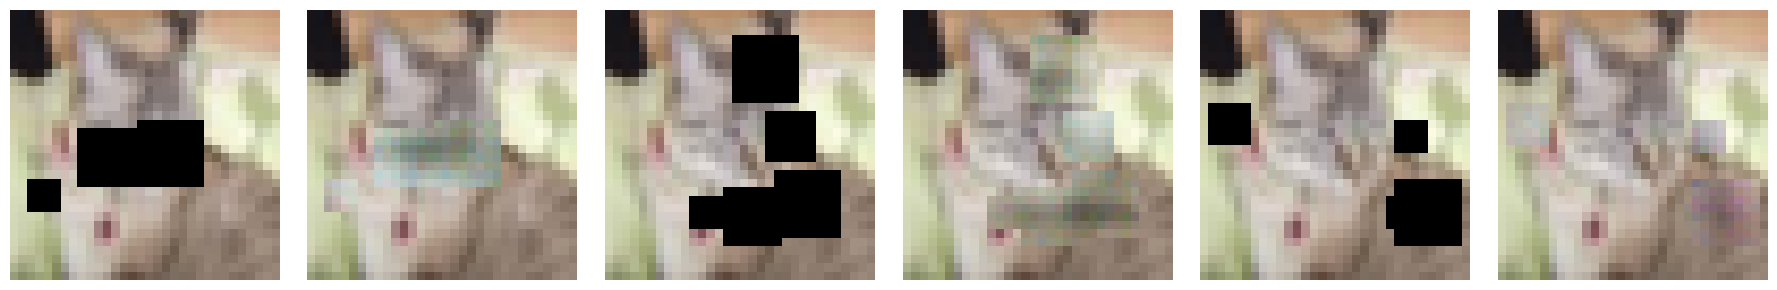

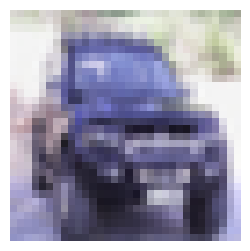

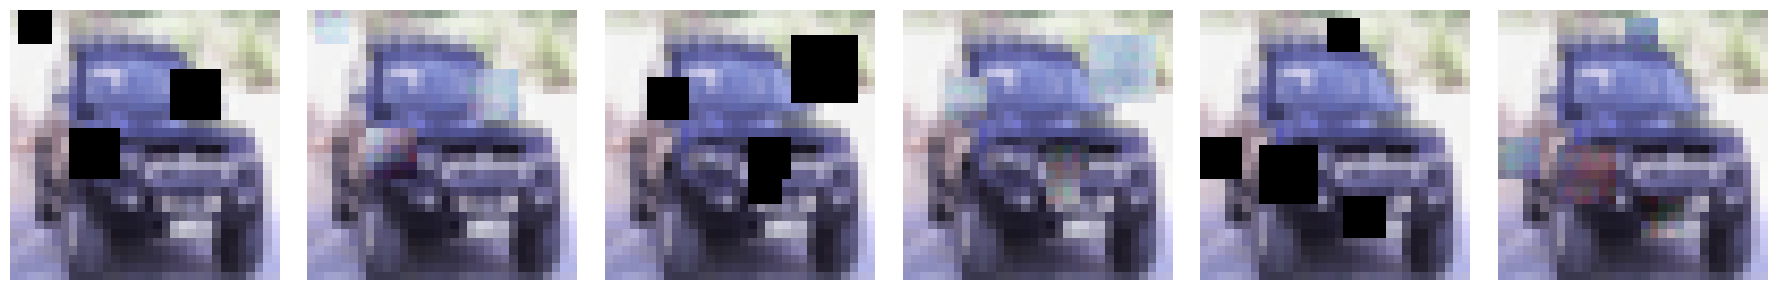

In [12]:
%matplotlib inline

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from train import GeneratorNet, DiscriminatorNet

device = "cuda" if torch.cuda.is_available() else "cpu"

@torch.no_grad()
def visualize(n=10):
    models = torch.load('models.pt', map_location=device)
    g_net = GeneratorNet().to(device)
    g_net.load_state_dict(models['g_net_state_dict'])
    g_net.eval()
    d_net = DiscriminatorNet().to(device)
    d_net.load_state_dict(models['d_net_state_dict'])
    d_net.eval()
    X = datasets.CIFAR10(root="data", download=True, train=False, transform=ToTensor())
    
    for idx in range(n):
        x, _ = X[idx]
        x = x.unsqueeze(0).to(device)
        fig0, ax0 = plt.subplots(1, 1, figsize=(3, 3))
        ax0.imshow(x.squeeze().permute(1, 2, 0).cpu())
        ax0.axis('off')
        plt.show()
        fig, ax = plt.subplots(1, 6, figsize=(18, 3))
        col = 0
        for j in range(3):
            mask = torch.zeros(1, 1, 32, 32, device=device)
            num_blocks = torch.randint(3, 7, (1,)).item()
            for _ in range(num_blocks):
                block_size = torch.randint(4, 9, (1,)).item()
                y = torch.randint(0, 32 - block_size, (1,)).item()
                z = torch.randint(0, 32 - block_size, (1,)).item()
                mask[:, :, y:y + block_size, z:z + block_size] = 1
            x_masked = x * (1 - mask)
            x_fake = g_net(x_masked, mask)
            x_final = mask * x_fake + (1 - mask) * x
            ax[col].imshow(x_masked.squeeze().permute(1, 2, 0).cpu())
            ax[col].axis('off')
            col += 1
            ax[col].imshow(x_final.squeeze().permute(1, 2, 0).cpu())
            ax[col].axis('off')
            col += 1
        plt.tight_layout()
        plt.show()

visualize()
